In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.com/UBC-MDS/dsci573-lab4-auyeung-chan

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

It is a classification problem with tabular data. The data set includes demographic information of each client and their histories of payment of the past 6 months. Success in predicting whether a client will default or not is valuable as it enables banks to assess the risks earlier and impose necessary measures to clients are with high chance of defaulting.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from joblib import dump, load
from scipy.stats import lognorm, loguniform, randint
import os
import altair as alt
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')

from functions import *

In [3]:
data_full = pd.read_csv( 'UCI_Credit_Card.csv')
data_full = data_full.rename( columns = { 'PAY_0': 'PAY_1', 'default.payment.next.month': 'default'})

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [4]:
train_df, test_df = train_test_split( data_full, train_size = 0.2, random_state = 69)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

For features related to bill statement amounts and payment amounts, they are highly positively skewed with negative values. It implies that they cannot be simply fixed by logarithmic transformation. For the target variable, there is obvious class imbalance. To balance both the ability to identify defaulting clients and the cost of having false alarms, we will choose f1 score as our main metric for assessment, together with precision and recall for references.

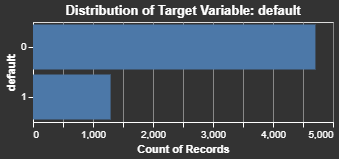

In [5]:
alt.Chart( train_df, title = 'Distribution of Target Variable: default').mark_bar().encode(
    x = 'count()',
    y = 'default:N'
).properties(
    height = 100,
    width = 300)

It can be seen that there is class imbalance in the target variable. More clients do not default.

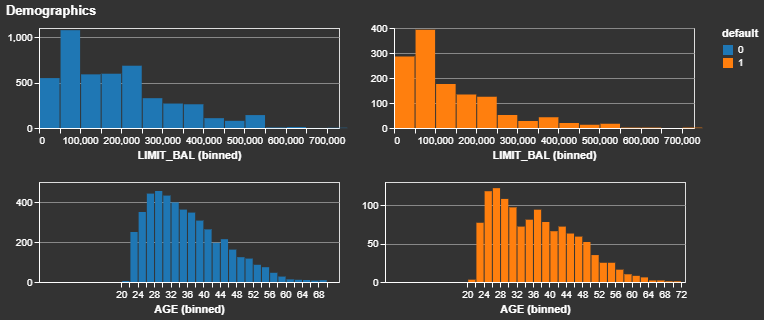

In [6]:
hist( train_df = train_df, feat_list = [ 'LIMIT_BAL', 'AGE'], repeat = True, title = 'Demographics', n_bins = 30)

Both amount of credit and age are positively skewed. No visual difference is observed.

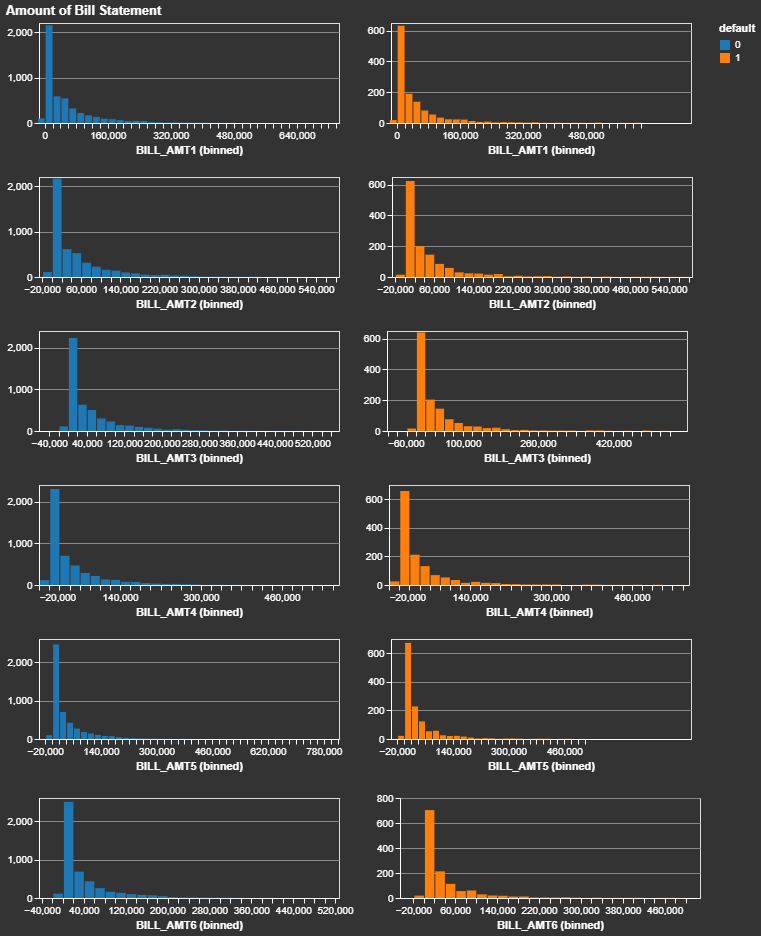

In [7]:
hist( train_df = train_df, feat_list = [ 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'],
     repeat = True, title = 'Amount of Bill Statement', n_bins = 50)

All amounts of bill statements are positively skewed. No visual difference is observed.

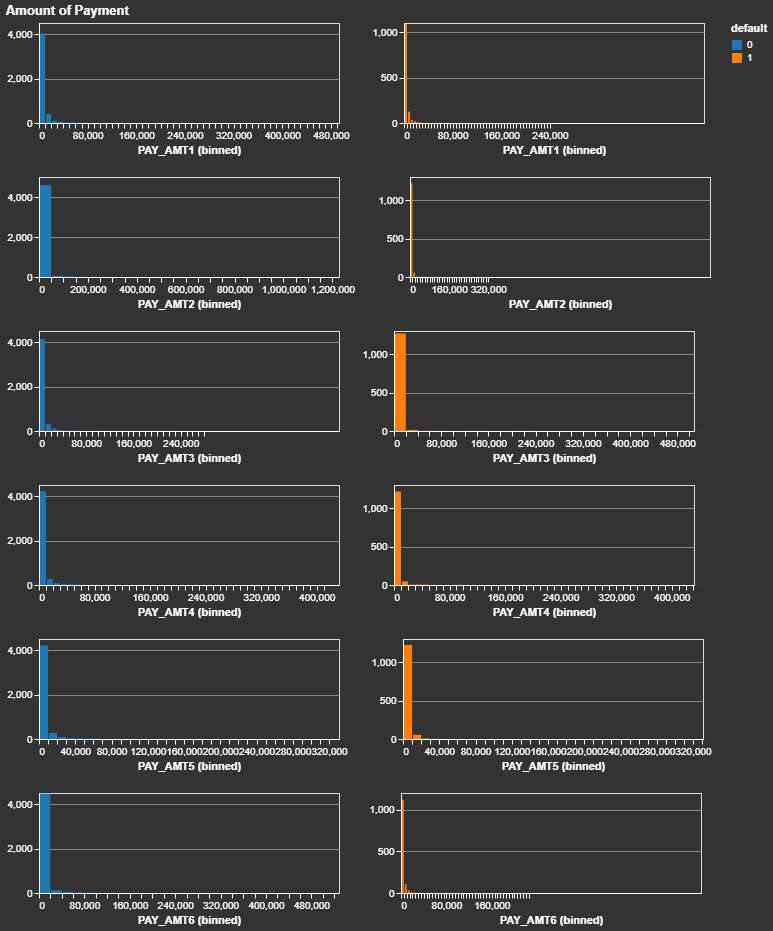

In [8]:
hist( train_df = train_df, feat_list = [ 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
     repeat = True, title = 'Amount of Payment', n_bins = 50)

Amounts of payments are heavily positively skewed. No visual difference is observed.

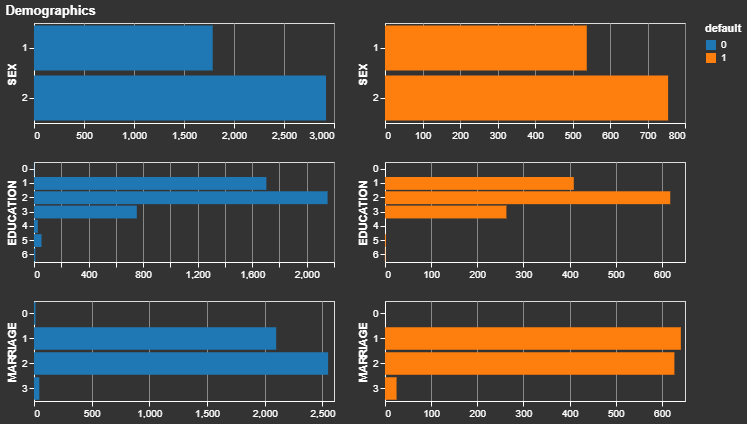

In [9]:
bar( train_df = train_df, feat_list = [ ('SEX', [ 1, 2]), ('EDUCATION', [ 0, 1, 2, 3, 4, 5, 6]),
                                      ( 'MARRIAGE', [ 0, 1, 2, 3])],
     repeat = True, title = 'Demographics')

There are some missing values, undocumented. More data cleaning should be done. No visual difference is observed.

0 means missing value?

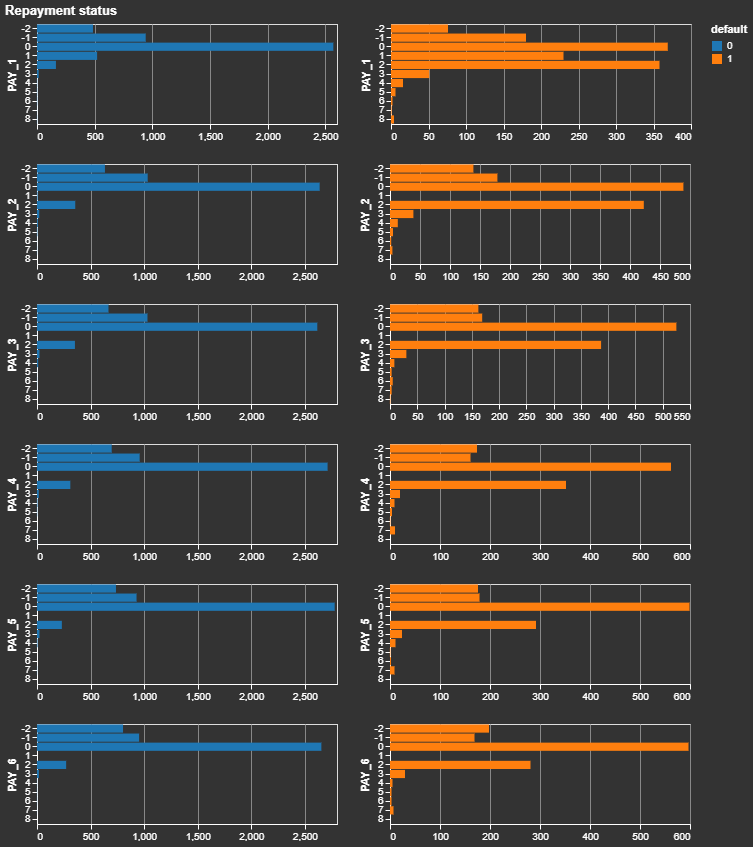

In [10]:
bar( train_df = train_df, feat_list = [ ('PAY_1', list( range( -2, 9))),
                                       ('PAY_2', list( range( -2, 9))),
                                       ('PAY_3', list( range( -2, 9))),
                                       ('PAY_4', list( range( -2, 9))),
                                       ('PAY_5', list( range( -2, 9))),
                                       ('PAY_6', list( range( -2, 9)))],
     repeat = True, title = 'Repayment status')

There are some missing values, undocumented. More data cleaning should be done. No visual difference is observed.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [11]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,15080.959500,166932.666667,1.61250,1.861500,1.550833,35.417500,-0.006333,-0.135500,-0.173667,-0.206167,...,42794.654167,39930.022833,38479.007333,5765.805667,6.088104e+03,5169.488000,4875.771667,4749.341167,5059.110167,0.215500
std,8616.929849,129111.214658,0.48722,0.798806,0.524845,9.245635,1.154057,1.215615,1.203778,1.182467,...,63786.677037,61140.017271,59882.276611,16414.732654,2.376207e+04,16159.173269,16751.589519,15027.193006,17396.518485,0.411203
min,12.000000,10000.000000,1.00000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-20320.000000,-37594.000000,-45734.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7532.500000,50000.000000,1.00000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2258.500000,1756.500000,1150.000000,897.250000,8.000000e+02,362.000000,291.000000,173.750000,35.000000,0.000000
50%,15101.000000,140000.000000,2.00000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19121.000000,18103.500000,16725.000000,2100.000000,2.021000e+03,1743.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.000000,240000.000000,2.00000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54866.250000,49952.000000,48335.750000,5000.000000,5.000000e+03,4300.000000,4000.000000,4000.000000,4000.000000,0.000000
max,29988.000000,730000.000000,2.00000,6.000000,3.000000,72.000000,8.000000,7.000000,8.000000,8.000000,...,572805.000000,823540.000000,527566.000000,493358.000000,1.227082e+06,508229.000000,432130.000000,330982.000000,528666.000000,1.000000


In [12]:
def log_func(x):
    return np.log(x+1)

def translation_func( x):
    return  min(x)

In [13]:
from sklearn.preprocessing import PowerTransformer

cols_std = [ 'AGE'] # Numeric
cols_pow_std = [ 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT5', 'BILL_AMT5', 'BILL_AMT6'
               ] # Numeric and highly skewed
cols_cat = [ 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] # Categorical data
cols_drop = [ 'ID']


pipe_pow_std = make_pipeline(
    PowerTransformer(), StandardScaler())

column_transformer = make_column_transformer(
    ( StandardScaler(), cols_std),
    ( pipe_pow_std, cols_pow_std),
    ( OneHotEncoder(handle_unknown = 'ignore', sparse = False), cols_cat),
    ( 'drop', cols_drop)
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [19]:
from sklearn.dummy import DummyClassifier

X_train, y_train = train_df.drop( 'default', axis = 1), train_df[ 'default']
X_test, y_test = test_df.drop( 'default', axis = 1), test_df[ 'default']

dummy = DummyClassifier()
pipe_dummy = make_pipeline(
    column_transformer, dummy)

result_dict = {}

cv_scoring_metrics = [ 'accuracy', 'precision', 'recall', 'f1']
result = cross_validate( pipe_dummy, X_train, y_train, cv = 5, scoring = cv_scoring_metrics, return_train_score = True)

C:\Users\User\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\miniconda3\envs\573\lib\site-packages\sklearn\metrics\_classification.py:1334

In [20]:
result_dict[ 'dummy'] = pd.DataFrame( result).agg( [ 'mean', 'std']).T
result_dict[ 'dummy']

,mean,std
fit_time,0.128210,0.012574
score_time,0.014603,0.002519
test_accuracy,0.784500,0.000456
train_accuracy,0.784500,0.000114
test_precision,0.000000,0.000000
train_precision,0.000000,0.000000
test_recall,0.000000,0.000000
train_recall,0.000000,0.000000
test_f1,0.000000,0.000000
train_f1,0.000000,0.000000


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

As the discrepancies between train and validation scores are small, we reason that the model is not overfitting. The logistic regression model achives a cross-validation precision of 0.46, a recall of 0.64, and an f1 score of 0.54.

In [21]:
param_grid = {
    "logisticregression__C": loguniform(1e-3, 1e3)}

pipe_lr = make_pipeline(column_transformer, LogisticRegression(max_iter = 2000, class_weight = 'balanced', random_state=69))

random_search = RandomizedSearchCV(
    pipe_lr,
    param_grid,
    scoring = 'f1',
    n_iter=50,
    n_jobs=-1,
    random_state=69,
    return_train_score=True,
)

In [22]:
random_search.fit(X_train, y_train)
print("Best hyperparameter values: ", random_search.best_params_)
# print("Best score: %0.3f" % (random_search.best_score_))

Best hyperparameter values:  {'logisticregression__C': 1.2004186825129166}


In [23]:
best_c = random_search.best_params_['logisticregression__C']
pipe_lr_opt = make_pipeline(column_transformer, LogisticRegression(max_iter = 2000, class_weight = 'balanced', C = best_c, random_state=69))

In [24]:
result = cross_validate( pipe_lr_opt, X_train, y_train, cv = 5, scoring = cv_scoring_metrics, return_train_score = True)

In [25]:
result_dict[ 'lr'] = pd.DataFrame( result).agg( [ 'mean', 'std']).T
result_dict['lr']

,mean,std
fit_time,0.797798,0.098811
score_time,0.039601,0.005899
test_accuracy,0.763000,0.020938
train_accuracy,0.764458,0.005062
test_precision,0.464589,0.034360
train_precision,0.466728,0.008067
test_recall,0.641130,0.037803
train_recall,0.650810,0.009510
test_f1,0.538582,0.035006
train_f1,0.543577,0.007519


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

From the cross-validation results, it is seen that all classifers are seriously overfitting as the discrepancy between the train and validation score is large, for precision, recall and f1. They all perform worse compared to the linear model.

In [26]:
column_transformer.fit( X_train)
print( f'There are {len( cols_std + cols_pow_std)} numeric columns')
print( f'There are {len( column_transformer.named_transformers_[ "onehotencoder"].get_feature_names_out())} categorical columns')

There are 14 numeric columns
There are 74 categorical columns


In [27]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier


pipe_rfc = make_pipeline( column_transformer, RandomForestClassifier( n_estimators = 500, class_weight = 'balanced', n_jobs = -1, random_state = 69))
pipe_gbc = make_pipeline( column_transformer, GradientBoostingClassifier( n_estimators = 500, random_state = 69))
pipe_hgbc = make_pipeline( column_transformer, HistGradientBoostingClassifier( categorical_features = [ range( 14, 68)], random_state = 69))

In [28]:
cv_rfc = pd.DataFrame( cross_validate( pipe_rfc, X_train, y_train, cv = 5, scoring = cv_scoring_metrics, return_train_score = True)
                     ).agg( [ 'mean', 'std']).T
cv_gbc = pd.DataFrame( cross_validate( pipe_gbc, X_train, y_train, cv = 5, scoring = cv_scoring_metrics, return_train_score = True)
                     ).agg( [ 'mean', 'std']).T
cv_hgbc = pd.DataFrame( cross_validate( pipe_hgbc, X_train, y_train, cv = 5, scoring = cv_scoring_metrics, return_train_score = True)
                      ).agg( [ 'mean', 'std']).T

In [29]:
result_dict[ 'RFC'] = cv_rfc
result_dict[ 'GBC'] = cv_gbc
result_dict[ 'HGBC'] = cv_hgbc

pd.concat( result_dict, axis = 1)

dummy                  lr                 RFC            \
                     mean       std      mean       std      mean       std   
fit_time         0.128210  0.012574  0.797798  0.098811  3.840801  0.342403   
score_time       0.014603  0.002519  0.039601  0.005899  0.398196  0.029353   
test_accuracy    0.784500  0.000456  0.763000  0.020938  0.817167  0.009906   
train_accuracy   0.784500  0.000114  0.764458  0.005062  0.999708  0.000186   
test_precision   0.000000  0.000000  0.464589  0.034360  0.660230  0.058110   
train_precision  0.000000  0.000000  0.466728  0.008067  0.998649  0.000863   
test_recall      0.000000  0.000000  0.641130  0.037803  0.317850  0.014157   
train_recall     0.000000  0.000000  0.650810  0.009510  1.000000  0.000000   
test_f1          0.000000  0.000000  0.538582  0.035006  0.428518  0.020043   
train_f1         0.000000  0.000000  0.543577  0.007519  0.999324  0.000432   

                       GBC                HGBC            
                      mean       std      mean       std  
fit_time         17.557475  0.460464  5.112908  0.258781  
score_time        0.032385  0.009299  0.086402  0.050106  
test_accuracy     0.811833  0.011538  0.818000  0.011205  
train_accuracy    0.894917  0.002782  0.922042  0.004196  
test_precision    0.613728  0.054328  0.640365  0.053795  
train_precision   0.903279  0.009390  0.963254  0.005397  
test_recall       0.348792  0.019427  0.358840  0.023310  
train_recall      0.573860  0.011344  0.663574  0.019803  
test_f1           0.444292  0.025790  0.459461  0.028651  
train_f1          0.701779  0.009394  0.785673  0.014003

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

Overfitting is even more serious after hyperparameter optimization. Logistic regression is still the best model.

In [30]:
param_dist_rfc = {
    'randomforestclassifier__max_depth': [ 10*x for x in range( 1, 11)],
    'randomforestclassifier__max_features': [ 'sqrt', 'log2'],
    'randomforestclassifier__criterion': [ 'gini', 'entropy', 'log_loss'],
    'randomforestclassifier__bootstrap': [ True, False]
}

param_dist_gbc = {
    'gradientboostingclassifier__max_depth': [ 10*x for x in range( 1, 11)],
    'gradientboostingclassifier__max_features': [ 'sqrt', 'log2'],
    'gradientboostingclassifier__criterion': [ 'friedman_mse', 'squared_error']
}

param_dist_hgbc = {
    'histgradientboostingclassifier__max_depth': [ 10*x for x in range( 1, 11)],
    'histgradientboostingclassifier__learning_rate': np.linspace( 0.1, 1, 10)
}

search_rfc = RandomizedSearchCV(
    pipe_rfc, param_dist_rfc, n_iter = 15, cv = 3, scoring = 'f1', n_jobs=-1, return_train_score = True, random_state = 69
)

search_gbc = RandomizedSearchCV(
    pipe_gbc, param_dist_gbc, n_iter = 15, cv = 3, scoring = 'f1', n_jobs=-1, return_train_score = True, random_state = 69
)

search_hgbc = RandomizedSearchCV(
    pipe_hgbc, param_dist_hgbc, n_iter = 15, cv = 3, scoring = 'f1', n_jobs=-1, return_train_score = True, random_state = 69
)

In [31]:
search_rfc.fit( X_train, y_train)
search_gbc.fit( X_train, y_train)
search_hgbc.fit( X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['AGE']),
                                                                              ('pipeline',
                                                                               Pipeline(steps=[('powertransformer',
                                                                                                PowerTransformer()),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['LIMIT_BAL',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'BILL_AMT1',
                                                                                'BILL_...
                                              HistGradientBoostingClassifier(categorical_features=[range(14, 68)],
                                                                             random_state=69))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'histgradientboostingclassifier__learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'histgradientboostingclassifier__max_depth': [10,
                                                                                      20,
                                                                                      30,
                                                                                      40,
                                                                                      50,
                                                                                      60,
                                                                                      70,
                                                                                      80,
                                                                                      90,
                                                                                      100]},
                   random_state=69, return_train_score=True, scoring='f1')

In [32]:
best_params_rfc = search_rfc.best_params_
best_params_gbc = search_gbc.best_params_
best_params_hgbc = search_hgbc.best_params_

In [33]:
best_params_rfc, best_params_gbc, best_params_hgbc

({'randomforestclassifier__max_features': 'sqrt',
  'randomforestclassifier__max_depth': 10,
  'randomforestclassifier__criterion': 'log_loss',
  'randomforestclassifier__bootstrap': False},
 {'gradientboostingclassifier__max_features': 'sqrt',
  'gradientboostingclassifier__max_depth': 80,
  'gradientboostingclassifier__criterion': 'squared_error'},
 {'histgradientboostingclassifier__max_depth': 40,
  'histgradientboostingclassifier__learning_rate': 0.2})

In [34]:
pipe_rfc_opt = make_pipeline( column_transformer, RandomForestClassifier(
    n_estimators = 500, class_weight = 'balanced', 
    max_features = best_params_rfc[ 'randomforestclassifier__max_features'],
    max_depth = best_params_rfc[ 'randomforestclassifier__max_depth'],
    criterion = best_params_rfc[ 'randomforestclassifier__criterion'],
    bootstrap =  best_params_rfc[ 'randomforestclassifier__bootstrap'],
    n_jobs = -1, random_state = 69))

pipe_gbc_opt = make_pipeline( column_transformer, GradientBoostingClassifier(
    max_features = best_params_gbc[ 'gradientboostingclassifier__max_features'],
    max_depth = best_params_gbc[ 'gradientboostingclassifier__max_depth'],
    criterion = best_params_gbc[ 'gradientboostingclassifier__criterion'],
    n_estimators = 500, random_state = 69))

pipe_hgbc_opt = make_pipeline( column_transformer, HistGradientBoostingClassifier(
    max_depth = best_params_hgbc[ 'histgradientboostingclassifier__max_depth'],
    learning_rate = best_params_hgbc[ 'histgradientboostingclassifier__learning_rate'],
    categorical_features = [ range( 14, 68)], random_state = 69))

cv_rfc_opt = pd.DataFrame( cross_validate( pipe_rfc_opt, X_train, y_train, cv = 5, scoring = cv_scoring_metrics, return_train_score = True)
                     ).agg( [ 'mean', 'std']).T
cv_gbc_opt = pd.DataFrame( cross_validate( pipe_gbc_opt, X_train, y_train, cv = 5, scoring = cv_scoring_metrics, return_train_score = True)
                     ).agg( [ 'mean', 'std']).T
cv_hgbc_opt = pd.DataFrame( cross_validate( pipe_hgbc_opt, X_train, y_train, cv = 5, scoring = cv_scoring_metrics, return_train_score = True)
                      ).agg( [ 'mean', 'std']).T

In [35]:
result_dict[ 'RFC_opt'] = cv_rfc_opt
result_dict[ 'GBC_opt'] = cv_gbc_opt
result_dict[ 'HGBC_opt'] = cv_hgbc_opt

pd.concat( result_dict, axis = 1)

dummy                  lr                 RFC            \
                     mean       std      mean       std      mean       std   
fit_time         0.128210  0.012574  0.797798  0.098811  3.840801  0.342403   
score_time       0.014603  0.002519  0.039601  0.005899  0.398196  0.029353   
test_accuracy    0.784500  0.000456  0.763000  0.020938  0.817167  0.009906   
train_accuracy   0.784500  0.000114  0.764458  0.005062  0.999708  0.000186   
test_precision   0.000000  0.000000  0.464589  0.034360  0.660230  0.058110   
train_precision  0.000000  0.000000  0.466728  0.008067  0.998649  0.000863   
test_recall      0.000000  0.000000  0.641130  0.037803  0.317850  0.014157   
train_recall     0.000000  0.000000  0.650810  0.009510  1.000000  0.000000   
test_f1          0.000000  0.000000  0.538582  0.035006  0.428518  0.020043   
train_f1         0.000000  0.000000  0.543577  0.007519  0.999324  0.000432   

                       GBC                HGBC             RFC_opt            \
                      mean       std      mean       std      mean       std   
fit_time         17.557475  0.460464  5.112908  0.258781  5.296311  0.729763   
score_time        0.032385  0.009299  0.086402  0.050106  0.428793  0.044152   
test_accuracy     0.811833  0.011538  0.818000  0.011205  0.788500  0.013685   
train_accuracy    0.894917  0.002782  0.922042  0.004196  0.884708  0.005023   
test_precision    0.613728  0.054328  0.640365  0.053795  0.509131  0.030038   
train_precision   0.903279  0.009390  0.963254  0.005397  0.706841  0.012342   
test_recall       0.348792  0.019427  0.358840  0.023310  0.543683  0.024763   
train_recall      0.573860  0.011344  0.663574  0.019803  0.794856  0.011065   
test_f1           0.444292  0.025790  0.459461  0.028651  0.525752  0.026793   
train_f1          0.701779  0.009394  0.785673  0.014003  0.748225  0.010011   

                   GBC_opt            HGBC_opt            
                      mean       std      mean       std  
fit_time         17.739929  1.983960  5.875998  0.486026  
score_time        0.092786  0.014657  0.074799  0.008262  
test_accuracy     0.814667  0.009585  0.811500  0.017484  
train_accuracy    0.999708  0.000186  0.976250  0.002398  
test_precision    0.627085  0.049407  0.606329  0.074996  
train_precision   1.000000  0.000000  0.996334  0.000581  
test_recall       0.352635  0.024396  0.367325  0.034875  
train_recall      0.998647  0.000865  0.893080  0.011174  
test_f1           0.450441  0.022946  0.456710  0.043761  
train_f1          0.999323  0.000433  0.941856  0.006199

In [36]:
result_dict_opt = {
    'LogReg': pd.DataFrame( result).agg( [ 'mean', 'std']).T,
    'RFC_opt': cv_rfc_opt,
    'GBC_opt': cv_gbc_opt,
    'HGBC_opt': cv_hgbc_opt}
pd.concat( result_dict_opt, axis = 1)

LogReg             RFC_opt              GBC_opt            \
                     mean       std      mean       std       mean       std   
fit_time         0.797798  0.098811  5.296311  0.729763  17.739929  1.983960   
score_time       0.039601  0.005899  0.428793  0.044152   0.092786  0.014657   
test_accuracy    0.763000  0.020938  0.788500  0.013685   0.814667  0.009585   
train_accuracy   0.764458  0.005062  0.884708  0.005023   0.999708  0.000186   
test_precision   0.464589  0.034360  0.509131  0.030038   0.627085  0.049407   
train_precision  0.466728  0.008067  0.706841  0.012342   1.000000  0.000000   
test_recall      0.641130  0.037803  0.543683  0.024763   0.352635  0.024396   
train_recall     0.650810  0.009510  0.794856  0.011065   0.998647  0.000865   
test_f1          0.538582  0.035006  0.525752  0.026793   0.450441  0.022946   
train_f1         0.543577  0.007519  0.748225  0.010011   0.999323  0.000433   

                 HGBC_opt            
                     mean       std  
fit_time         5.875998  0.486026  
score_time       0.074799  0.008262  
test_accuracy    0.811500  0.017484  
train_accuracy   0.976250  0.002398  
test_precision   0.606329  0.074996  
train_precision  0.996334  0.000581  
test_recall      0.367325  0.034875  
train_recall     0.893080  0.011174  
test_f1          0.456710  0.043761  
train_f1         0.941856  0.006199

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [37]:
pipe_rfc_opt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['AGE']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('powertransformer',
                                                                   PowerTransformer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT5', 'BIL...
                                                   'BILL_AMT6']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE', 'PAY_1', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6']),
                                                 ('drop', 'drop', ['ID'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        criterion='log_loss', max_depth=10,
                                        n_estimators=500, n_jobs=-1,
                                        random_state=69))])

In [38]:
import eli5

eli5.explain_weights(pipe_rfc_opt.named_steps["randomforestclassifier"], feature_names=column_names)

Weight,Feature
0.1031 ± 0.1651,PAY_1_2
0.0610 ± 0.1444,PAY_2_2
0.0498 ± 0.0490,PAY_AMT1
0.0480 ± 0.0443,LIMIT_BAL
0.0461 ± 0.0941,PAY_1_0
0.0405 ± 0.0375,PAY_AMT2
0.0403 ± 0.1215,PAY_3_2
0.0394 ± 0.0399,PAY_AMT3
0.0375 ± 0.1032,PAY_4_2
0.0372 ± 0.0309,BILL_AMT1


From the graph above, we can see that `PAY_1_2` and `PAY_2_2` has the highest weight in the random forest classifier. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

The test scores are consistent with the cross-validation scores. It implies that the model is with good generalizability.

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pipe_lr_opt.fit( X_train, y_train)
y_hat = pipe_lr_opt.predict( X_test)
print( f'Test accuracy is { accuracy_score( y_test, y_hat):.2f}.')
print( f'Test precision is { precision_score( y_test, y_hat):.2f}.')
print( f'Test recall is { recall_score( y_test, y_hat):.2f}.')
print( f'Test f1 score is { f1_score( y_test, y_hat):.2f}.')

Test accuracy is 0.76.
Test precision is 0.46.
Test recall is 0.61.
Test f1 score is 0.53.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

In conclusion, the logistic regression model is the best model to be employed. It has good prediction performane and interpretability. The model achieves a test f1 score of 0.53, a test precision of 0.46, and a test recall of 0.61. It suggests the model can identify around 61% of all defaulting clients, while having 54% as false alarms.

What we have not done includes tuning the threshold for the decision boundary and evaluating whether the predicted probability output can be realiably used in risk assessment.

In [47]:
cv_train_scores = result_dict_opt[ 'LogReg'].loc[
    [ 'train_accuracy', 'train_precision', 'train_recall', 'train_f1'], 'mean'
    ].reset_index( drop = True)
cv_test_scores = result_dict_opt[ 'LogReg'].loc[
    [ 'test_accuracy', 'test_precision', 'test_recall', 'test_f1'], 'mean'
    ].reset_index( drop = True)

In [53]:
pd.DataFrame({
    'Scores': [ 'accuracy', 'precision', 'recall', 'f1'], 'CV - Train': cv_train_scores, 'Validation': cv_test_scores,
    'Test': [ accuracy_score( y_test, y_hat), precision_score( y_test, y_hat), recall_score( y_test, y_hat), f1_score( y_test, y_hat)]
}).set_index( 'Scores')

,CV - Train,Validation,Test
Scores,,,
accuracy,0.764458,0.763000,0.756667
precision,0.466728,0.464589,0.464616
recall,0.650810,0.641130,0.610706
f1,0.543577,0.538582,0.527737


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

Data science and machine learning is not blindly plugging models to the data. Most effort should be put on feature engineering and interpretability.

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans: 5. Hyperparameter tuning takes a lot of time.

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: